In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
import psycopg2 
import io
from config import AWS

In [2]:
# pull from database 

# engine = create_engine(AWS)

# employment_county_df = pd.read_sql('employ_county', engine)

In [3]:
employment_county_df  = pd.read_csv('../data_files/Employment_by_County_with_state-with %.csv', index_col=0)
employment_county_df.head(5)

,geoid,county,labor_force,employed,unemployed,unemployed%_county,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state,unemployement%_state
index,,,,,,,,,,,,,,,,
0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama,5.88
1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama,5.88
2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama,5.88
3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama,5.88
4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama,5.88


# Copy of the dataframe to feed ML 



In [4]:
employment_county_copy = employment_county_df.copy()

In [5]:
employment_county_copy.columns.to_list()

['geoid',
 'county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed%_county',
 'population',
 'race_white',
 'race_black',
 'race_native',
 'race_asian',
 'race_islander',
 'race_other',
 'race_two_or_more',
 'state',
 'unemployement%_state']

In [6]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3124
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geoid                 3125 non-null   int64  
 1   county                3125 non-null   object 
 2   labor_force           3125 non-null   int64  
 3   employed              3125 non-null   int64  
 4   unemployed            3125 non-null   int64  
 5   unemployed%_county    3125 non-null   float64
 6   population            3125 non-null   int64  
 7   race_white            3125 non-null   int64  
 8   race_black            3125 non-null   int64  
 9   race_native           3125 non-null   int64  
 10  race_asian            3125 non-null   int64  
 11  race_islander         3125 non-null   int64  
 12  race_other            3125 non-null   int64  
 13  race_two_or_more      3125 non-null   int64  
 14  state                 3125 non-null   object 
 15  unemployement%_state 

In [7]:
employment_county_copy['race_others']= employment_county_copy[['race_native','race_islander','race_other','race_two_or_more']].sum(axis=1)
employment_county_copy.head(5)

,geoid,county,labor_force,employed,unemployed,unemployed%_county,population,race_white,race_black,race_native,race_asian,race_islander,race_other,race_two_or_more,state,unemployement%_state,race_others
index,,,,,,,,,,,,,,,,,
0,1001,"Autauga County, Alabama",25838,24576,1262,4.9,58805,42160,11445,217,881,35,910,3157,Alabama,5.88,4319
1,1003,"Baldwin County, Alabama",96763,91338,5425,5.6,231767,189399,18217,1582,2067,143,5335,15024,Alabama,5.88,22084
2,1005,"Barbour County, Alabama",8587,7982,605,7.0,25223,11317,11933,116,117,1,1039,700,Alabama,5.88,1856
3,1007,"Bibb County, Alabama",8640,8067,573,6.6,22293,16555,4413,60,32,9,465,759,Alabama,5.88,1293
4,1009,"Blount County, Alabama",24661,23653,1008,4.1,59134,50663,845,337,178,24,3431,3656,Alabama,5.88,7448


In [8]:
# reducing columns to improve model performance 
employment_county_copy = employment_county_copy.drop(['race_native','race_islander','race_other','race_two_or_more'],axis=1)

In [9]:
employment_county_copy.isnull().values.any()

False

In [10]:
employment_county_copy.shape

(3125, 13)

In [11]:
employment_county_copy.columns.to_list()

['geoid',
 'county',
 'labor_force',
 'employed',
 'unemployed',
 'unemployed%_county',
 'population',
 'race_white',
 'race_black',
 'race_asian',
 'state',
 'unemployement%_state',
 'race_others']

In [12]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3124
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geoid                 3125 non-null   int64  
 1   county                3125 non-null   object 
 2   labor_force           3125 non-null   int64  
 3   employed              3125 non-null   int64  
 4   unemployed            3125 non-null   int64  
 5   unemployed%_county    3125 non-null   float64
 6   population            3125 non-null   int64  
 7   race_white            3125 non-null   int64  
 8   race_black            3125 non-null   int64  
 9   race_asian            3125 non-null   int64  
 10  state                 3125 non-null   object 
 11  unemployement%_state  3125 non-null   float64
 12  race_others           3125 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 341.8+ KB


In [13]:
employment_county_copy = employment_county_copy.drop(['county','state'],axis=1)

In [14]:
employment_county_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3125 entries, 0 to 3124
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geoid                 3125 non-null   int64  
 1   labor_force           3125 non-null   int64  
 2   employed              3125 non-null   int64  
 3   unemployed            3125 non-null   int64  
 4   unemployed%_county    3125 non-null   float64
 5   population            3125 non-null   int64  
 6   race_white            3125 non-null   int64  
 7   race_black            3125 non-null   int64  
 8   race_asian            3125 non-null   int64  
 9   unemployement%_state  3125 non-null   float64
 10  race_others           3125 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 293.0 KB


# Targeting "unemployed" but we can target any of the employment columns


In [15]:
# current model not overfitting have room to add data 

# to increase model prediction tutor suggested to add college no college data as 2 new columns 

# for true prediction our X should not have anything related to employment need to add education to this data 
X = employment_county_copy[['geoid','population','race_white', 'race_black', 'race_asian','race_others']]

y = employment_county_copy['unemployed']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=0)

In [17]:
regressor = RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [18]:
y_pred = regressor.predict(X_test)

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9005628604139096

In [20]:
regressor.score(X_train,y_train)

0.9432177959029809

In [21]:
regressor.score(X_test,y_test)

0.9005628604139096

In [22]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mae

673.96048

## Feature importance

In [23]:
sorted(zip(regressor.feature_importances_, X.columns), reverse=True)

[(0.7273448348824287, 'population'),
 (0.1255417096708646, 'race_others'),
 (0.10286665862579966, 'race_asian'),
 (0.03476151501950387, 'race_black'),
 (0.007172200134455987, 'race_white'),
 (0.002313081666947121, 'geoid')]

### MAE seem a bit high, but consider the min max range

In [24]:
max_labor_force = employment_county_df['labor_force'].max()
min_labor_force = employment_county_df['labor_force'].min()
print ('min = ', min_labor_force)
print('max = ', max_labor_force)

min =  184
max =  4921499


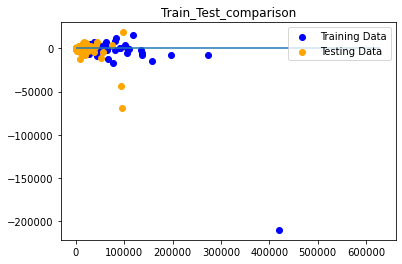

In [25]:
plt.scatter(regressor.predict(X_train), regressor.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(regressor.predict(X_test), regressor.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Train_Test_comparison")
plt.show()

In [26]:
print(f'Actual:\t\t{list(y_test[:10])}')
print(f'Predicted:\t{list(regressor.predict(X_test[:10]))}')

Actual:		[369, 129, 2149, 1436, 678, 1009, 1069, 11366, 186, 844]
Predicted:	[370.5, 170.7, 2076.6, 1551.5, 781.1, 1244.7, 1048.0, 9898.7, 430.5, 1166.8]


In [27]:
employment_county_copy.head(5)

,geoid,labor_force,employed,unemployed,unemployed%_county,population,race_white,race_black,race_asian,unemployement%_state,race_others
index,,,,,,,,,,,
0,1001,25838,24576,1262,4.9,58805,42160,11445,881,5.88,4319
1,1003,96763,91338,5425,5.6,231767,189399,18217,2067,5.88,22084
2,1005,8587,7982,605,7.0,25223,11317,11933,117,5.88,1856
3,1007,8640,8067,573,6.6,22293,16555,4413,32,5.88,1293
4,1009,24661,23653,1008,4.1,59134,50663,845,178,5.88,7448
